<a href="https://colab.research.google.com/github/Jang-Sohyun/IT-Bussiness-2022/blob/main/%5B%EA%B3%BC%EC%A0%9C1%5D_%EC%8B%9C%EA%B0%81%ED%99%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 건강검진정보 샘플 데이터 시각화

## 0.도입
<img src = "https://drive.google.com/uc?id=1vlG-Hu9YB8wBvZlmBRRKN6DwNeIMQav1">  

출처 : 국가지표체계(https://www.index.go.kr/unify/idx-info.do?idxCd=8021)

위의 그래프와 같이 시간이 지날수록 대한민국 국민들의 비만 문제가 심각해지고 있고, 최근 코로나 19로 인한 야외활동의 빈도가 감소하며 그 수가 크게 증가하고 있다.  

비만은 비만으로 그치는 것이 아니라 각종 질병의 원인이 될 수 있으며, 정신적인 질병까지 유발할 수 있다. 제2형 당뇨병, 이상지질혈증, 고혈압, 지방간, 담낭질환, 관상동맥질환(협심증, 심근경색증), 뇌졸중, 수면무호흡증, 통풍, 골관절염, 월경이상, 대장암, 유방암 등이 대표적인 비만과 관련된 질병들이다.  

출처 : 대한비만학회(http://general.kosso.or.kr/html/?pmode=obesityDisease)  

그래서 건강검진정보 데이터를 시각화한 다음 분석들을 통해 연령과 생활습관(음주여부, 흡연상태)에 따른 비만 정도를 알아보고, 비만인 경우 당뇨, 고혈압의 발생가능성이 실제로 높은지에 관한 연관성을 알아보고자 한다.

## 1.전처리
엑셀을 이용한 전처리 수행
- 필요없는 column(열) 삭제
- BMI (BMI = kg/m*m) column 추가
- 비만도 column 추가 (BMI가 18.5 이하면 저체중(underweight) ／ 18.5 ~ 22.9 사이면 정상(normal) ／ 23.0 ~ 24.9 사이면 과체중(overweight) ／ 25.0 이상부터는 비만(obesity)으로 판정)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

health = pd.read_csv("/content/drive/MyDrive/IT비즈니스혁신/과제1/health_data_전처리.csv")

display(health.head(10))
print(health.info())

,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),BMI,비만도,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,흡연상태,음주여부
0,1,36,M,9,165,60,22.038567,normal,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,No,No
1,2,27,F,13,150,65,28.888889,obesity,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,0.5,No,No
2,3,11,F,12,155,55,22.892820,normal,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,0.7,No,No
3,4,31,M,13,160,70,27.343750,obesity,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.2,No,No
4,5,41,F,12,155,50,20.811655,normal,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,No,No
5,6,27,M,9,185,85,24.835646,overweight,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.1,Yes,Yes
6,7,44,M,9,165,80,29.384757,obesity,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,0.7,Yes,Yes
7,8,41,M,13,160,65,25.390625,obesity,92.0,131.0,79.0,93.0,NaN,NaN,NaN,NaN,15.9,1.2,Yes,No
8,9,41,F,17,150,50,22.222222,normal,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,0.7,No,No
9,10,48,F,14,150,45,20.000000,normal,71.2,124.0,83.0,85.0,NaN,NaN,NaN,NaN,13.2,0.6,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   가입자일련번호      10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   BMI          10000 non-null  float64
 7   비만도          10000 non-null  object 
 8   허리둘레         10000 non-null  float64
 9   수축기혈압        9912 non-null   float64
 10  이완기혈압        9912 non-null   float64
 11  식전혈당(공복혈당)   9912 non-null   float64
 12  총콜레스테롤       4044 non-null   float64
 13  트리글리세라이드     4044 non-null   float64
 14  HDL콜레스테롤     4044 non-null   float64
 15  LDL콜레스테롤     3977 non-null   float64
 16  혈색소          9912 non-null   float64
 17  혈청크레아티닌      9912 non-null   float64
 18  흡연상태         9998 non-null   object 
 19  음주여부 

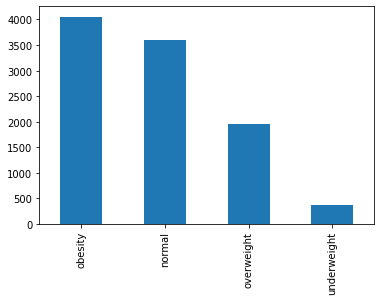

In [5]:
obesity = health['비만도'].value_counts()
obesity.plot.bar() #실제로 정상체중보다 비만인 경우가 더 많음을 알 수 있다.

## 2.Insight 1
연령과 생활습관(음주여부, 흡연상태)에 따른 비만 정도를 알아보기 위해 다음과 같이 시각화 하였다.  

첫번째 그래프는 연령대별 비만정도를 시각화 한 것으로 연령코드 11 즉, 50~54세의 연령대에서 비만이 가장 많이 나타나는 것을 확인할 수 있다.  

두번째 그래프는 흡연상태에 따른 비만정도인데, 흡연하지 않는 사람들에게서 오히려 비만이 많은 것으로 나타났다. 이는 흡연자보다 비흡연자의 수가 많기 때문에 나타난 결과로 보고, 비만과 흡연의 상관관계는 없는 것으로 판단할 수 있다.  

세번째 그래프는 음주여부에 따른 비만정도인데, 음주를 하는 경우에 비만이 높게 나타나는 것을 볼 수 있다. 실제로 음주를 자주 하는 경우 지방간과 함께 복부비만의 위험을 높일 수 있고, 이것이 실제 데이터로 확인된 것으로 보인다. 이는 첫번째 연령대별 비만도의 결과와도 연관된 것으로 보이는데, 50~54세 연령대에서는 직장에서의 회식, 퇴근 후 식사와 함께 반주를 하는 등 음주하는 경우가 잦기 때문일 것으로 추측된다.

연령대코드(5세단위)  비만도    
9            obesity    614
10           obesity    572
11           obesity    726
12           obesity    612
13           obesity    616
14           obesity    358
15           obesity    288
16           obesity    157
17           obesity    101
18           obesity     13
Name: 비만도, dtype: int64
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[614, 572, 726, 612, 616, 358, 288, 157, 101, 13]


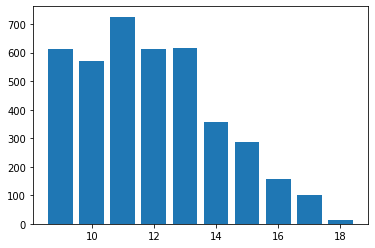

In [65]:
# 연령대별 비만정도
import matplotlib.pyplot as plt

obesity = health[health['비만도'] == 'obesity']
age_obe = obesity.groupby('연령대코드(5세단위)')['비만도'].value_counts()
print(age_obe)

age = health['연령대코드(5세단위)'].unique().tolist()
age_sorted = age.sort()
obe = age_obe.values.tolist()
print(age)
print(obe)

plt.bar(age, obe, align = 'center')
plt.show()

흡연상태    비만도    
No      obesity    2310
NotNow  obesity     964
Yes     obesity     783
Name: 비만도, dtype: int64
['No', 'Not Now', 'Yes']
[2310, 964, 783]


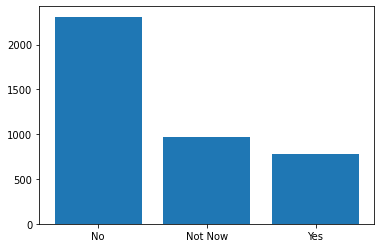

In [66]:
#흡연상태태에 따른 비만정도
obesity = health[health['비만도'] == 'obesity']
smoke_obe = obesity.groupby('흡연상태')['비만도'].value_counts()
print(smoke_obe)

smoke = ['No', 'Not Now', 'Yes']
obe = smoke_obe.values.tolist()
print(smoke)
print(obe)

plt.bar(smoke, obe, align = 'center')
plt.show()

음주여부  비만도    
No    obesity    1594
Yes   obesity    2463
Name: 비만도, dtype: int64
['No', 'Yes']
[1594, 2463]


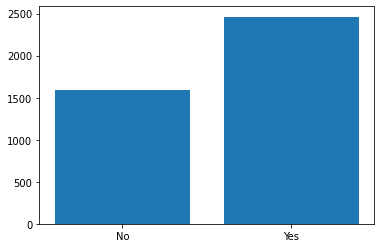

In [69]:
# 음주여부에 따른 비만정도
obesity = health[health['비만도'] == 'obesity']
alcohol_obe = obesity.groupby('음주여부')['비만도'].value_counts()
print(alcohol_obe)

alcohol = ['No', 'Yes']
obe = alcohol_obe.values.tolist()
print(alcohol)
print(obe)

plt.bar(alcohol, obe, align = 'center')
plt.show()

## 3.Insight 2
비만일수록 제2형 당뇨병 발생의 위험성이 5~13배 더 증가한다. 비만으로 인한 당뇨병은 인슐린이 충분히 있는데도 제대로 작용하지 못해 생기는 것으로 특히 복부 비만이 인슐린 저항성과 관련이 높다. 실제로 비만과 당뇨가 관련이 있는지 확인하기 위해 다음과 같이 시각화 하였다.  

허리둘레의 경우 남성은 90cm이상, 여성은 85cm 이상인 경우 '복부비만'에 해당하고, 공복혈당이 126mg/dL이상이면 당뇨병 위험수치로 판단한다.  

아래와 같이 허리둘레와 공복혈당 2가지 변수를 가지고 산점도로 시각화한 결과 허리둘레 85-90사이에 혈당이 126이상인 사람이 많이 분포되어 있는 것으로 보인다. 실제로 복부비만을 판정하는 기준이 허리둘레만은 아니기 때문에 산점도로 봤을 때에도 뚜렷한 양상을 띄고 있지는 않지만, 복부비만의 위험이 있는 85-90사이에 해당하는 사람들의 공복혈당을 시각화했을때, 126이상인 사람이 많은 것을 확인할 수 있다. 이는 실제 비만과 당뇨에 상관성이 있음을 보여준다.

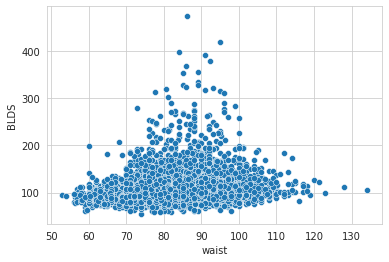

Text(0, 0.5, 'BLDS')

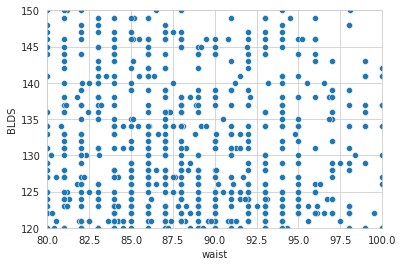

In [92]:
import seaborn as sns
sns.set_style("whitegrid")

ax = plt.subplot()
ax = sns.scatterplot(data = health, x = '허리둘레', y = '식전혈당(공복혈당)')
ax.set_xlabel('waist')
ax.set_ylabel('BLDS')
plt.show()

ax = sns.scatterplot(data = health, x = '허리둘레', y = '식전혈당(공복혈당)').set(xlim = (80, 100), ylim = (120, 150))
plt.xlabel('waist')
plt.ylabel('BLDS')

## 4.Insight 3
비만은 심혈관계 질환의 발생 가능성 역시 높인다. 비만도가 증가할수록 고혈압이 동반될 위험이 남여 각각 2.5배, 4배 더 높다. 또한 좋은 콜레스테롤인 HDL 콜레스테롤이 낮아지고, 나쁜 콜레스테롤인 LDL 콜레스테롤이 높아지는 이상지질혈증이 나타나기 쉽다. 실제 데이터에서도 비만과 고혈압 그리고 이상지질혈증이 관계가 있는지 알아보기 위해 다음과 같이 시각화 하였다.  

고혈압은 수축기 혈압 140mmHg이상 또는 이완기 혈압 90mmHg 이상으로 정의하고 정상범위는 120/80mmHg 미만이다. LDL 콜레스테롤은 130mg/dL이하, HDL 콜레스테롤은 60mg/dL이상이 정상 수치이다.  

첫번째와 두번째 그래프에서 수축기와 이완기 혈압이 평균적으로 비만에 속하는 사람에게서 높게 나타난 것을 볼 수 있고, 이는 실제로 비만과 고혈압 발생가능성이 관계가 있는 것을 나타낸다.  

콜레스테롤 수치 역시 몸에 좋은 HDL 콜레스테롤은 비만에 속하는 사람인 경우 가장 낮았고, LDL 콜레스테롤은 과체중인 경우에 가장 높은 것으로 나타났다. 이 역시 비만도와 이상지질혈증 발생 가능성이 연관이 있음을 보여준다.

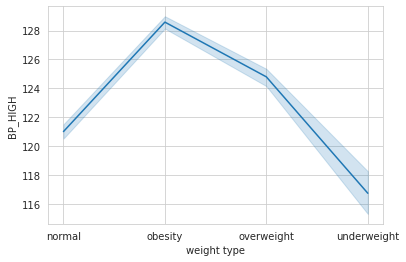

Text(0, 0.5, 'BP_HIGH')

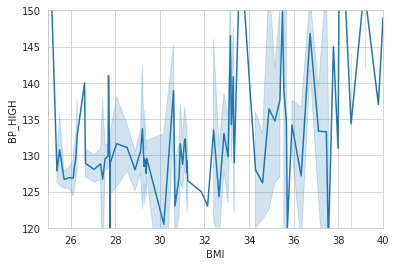

In [103]:
ax = plt.subplot()
ax = sns.lineplot(data = health, x = '비만도', y = '수축기혈압')
ax.set_xlabel('weight type')
ax.set_ylabel('BP_HIGH')
plt.show()

sns.lineplot(data = health, x = 'BMI', y = '수축기혈압').set(xlim = (25, 40), ylim = (120, 150))
plt.ylabel('BP_HIGH')

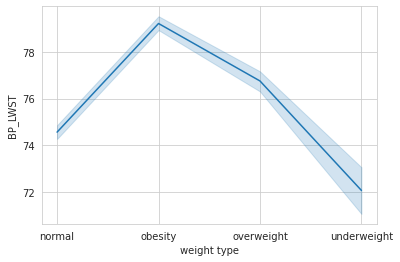

Text(0, 0.5, 'BP_LWST')

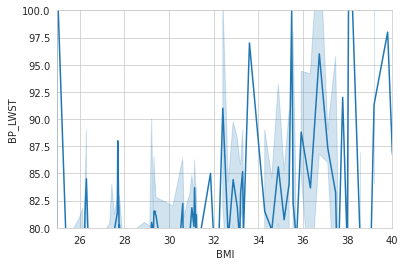

In [106]:
ax = plt.subplot()
ax = sns.lineplot(data = health, x = '비만도', y = '이완기혈압')
ax.set_xlabel('weight type')
ax.set_ylabel('BP_LWST')
plt.show()

sns.lineplot(data = health, x = 'BMI', y = '이완기혈압').set(xlim = (25, 40), ylim = (80, 100))
plt.ylabel('BP_LWST')

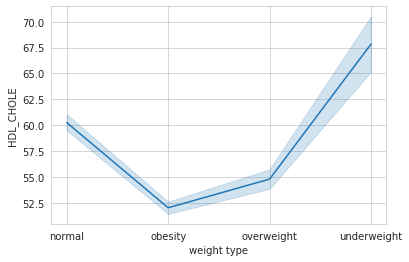

Text(0, 0.5, 'HDL_CHOLE')

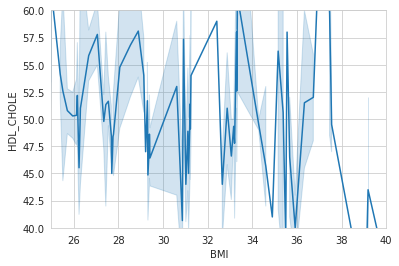

In [109]:
ax = plt.subplot()
ax = sns.lineplot(data = health, x = '비만도', y = 'HDL콜레스테롤')
ax.set_xlabel('weight type')
ax.set_ylabel('HDL_CHOLE')
plt.show()

sns.lineplot(data = health, x = 'BMI', y = 'HDL콜레스테롤').set(xlim = (25, 40), ylim = (40, 60))
plt.ylabel('HDL_CHOLE')

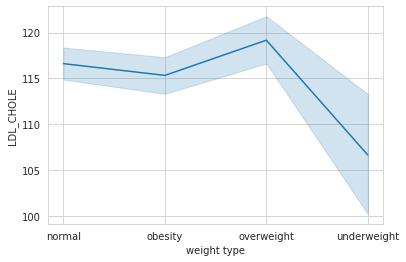

Text(0, 0.5, 'LDL_CHOLE')

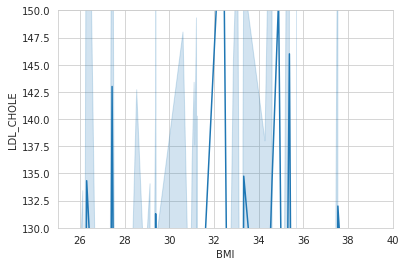

In [110]:
ax = plt.subplot()
ax = sns.lineplot(data = health, x = '비만도', y = 'LDL콜레스테롤')
ax.set_xlabel('weight type')
ax.set_ylabel('LDL_CHOLE')
plt.show()

sns.lineplot(data = health, x = 'BMI', y = 'LDL콜레스테롤').set(xlim = (25, 40), ylim = (130, 150))
plt.ylabel('LDL_CHOLE')

## 5.최종 정리
비만은 50~54세에 해당하는 사람에게서 많이 나타나며 흡연상태보다는 음주여부가 비만에 더 큰 영향을 주는 것을 확인할 수 있었다. 또한 그동안의 연구결과와 같이 실제로 비만인 경우 당뇨병과 고혈압, 이상지질혈증과 같은 다른 질병이 생길 가능성이 높은 것을 위의 실제 데이터를 시각화한 결과로 확인할 수 있었다. 